In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.morphology import dilation,binary_dilation
from scipy.ndimage import grey_dilation
from scipy.signal import convolve2d
import cv2
from skimage import io, exposure
from skimage.metrics import mean_squared_error , normalized_mutual_information
from scipy.ndimage import convolve
from statannotations.Annotator import Annotator

# 2D Kernel experience

In [2]:
subject = 0
#patch = '../../'
image_data = nib.load( 'sub-MRS' + str(subject).zfill(2) + '_ses-M0_UNIT1.nii.gz')
image = np.array(image_data.get_fdata())
header_image = image_data.header
res_1 = header_image["pixdim"][2]
res_2 = header_image["pixdim"][3]
print("res = ",res_1, res_2)
print (image.shape)
#image_data_sc = nib.load( patch + 'derivatives/labels/sub-MRS' + str(subject).zfill(2) + '/ses-M0/anat/sub-MRS' + str(subject).zfill(2) + '_ses-M0_UNIT1_label-SC_seg_rater2.nii.gz')
image_data_soft = nib.load('sub-MRS' + str(subject).zfill(2) + '_ses-M0_UNIT1_pred.nii.gz')
image_soft = np.array(image_data_soft.get_fdata())
image_soft_norm = cv2.normalize(image_soft, None, 0,1, cv2.NORM_MINMAX)

image_data_hard = nib.load('sub-MRS' + str(subject).zfill(2) + '_ses-M0_UNIT1_hard.nii.gz')
image_hard = np.array(image_data_hard.get_fdata())

#nii_save = nib.Nifti1Image(image_soft_norm, image_data.affine)
#nib.save(nii_save, '../data_sep/contrast-agnostic/test_contrast_mp2rage_marseille/sub-MRS' + str(subject).zfill(2) + '_ses-M0_UNIT1_soft.nii.gz')

res =  0.9375 0.9375
(176, 260, 320)


In [310]:
df = []
df_mse = []
for a in range(21, 29, 1):
    factor_a = a * 1
    for b in range(0, 1, 1):
        factor_b = b * 0.1
        for c in range(35, 45, 1):
            factor_c = c * 1
            print(factor_a,"/", factor_b,"/", factor_c)
            kernel = np.array([[factor_c , factor_a , factor_c ],
                               [factor_a , factor_b , factor_a ],
                               [factor_c , factor_a , factor_c ]])
            image_gt_bin_dil = np.zeros((image_hard.shape))
            image_gt_bin_dil_2 = np.zeros((image_hard.shape))
            for i in range (image_hard.shape[2]):
                image_gt_bin_dil[:,:,i] = convolve2d(image_hard[:,:,i], kernel, mode='same', boundary='wrap')
                #image_gt_bin_dil[:,:,i] = cv2.normalize(image_gt_bin_dil[:,:,i], None, 0,1, cv2.NORM_MINMAX)
            #    csa_gt_bin_soft = round (np.sum(image_gt_bin_dil[:,:,i])/np.max(image_gt_bin_dil) * res_1 * res_2, 2)
            #    csa_gt_bin = round (np.sum(image_hard[:,:,i]) * res_1 * res_2, 2)
             #   d = {"slice":i,"csa_gt_bin":csa_gt_bin,"csa_gt_bin_soft":csa_gt_bin_soft}
             #   df.append(d)
            #data = pd.DataFrame(data = df)
           # df1=data
            #df1 = df1.replace(0, np.nan)
            image_gt_bin_dil_2 = image_gt_bin_dil * image_hard
            image_gt_bin_dil_2_n = cv2.normalize(image_gt_bin_dil_2, None, 0,1, cv2.NORM_MINMAX)
            #mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2)
            mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2_n)
            mi =  normalized_mutual_information(image_soft_norm, image_gt_bin_dil_2_n)
            print(f"MSE: {mse}" , f"Mutual Information: {mi}")
            f = {"subject":subject,"factor_a":factor_a,"factor_b":factor_b,"factor_c":factor_c,"mse":mse,"mi":mi}
            df_mse.append(f)
            data_mse = pd.DataFrame(data = df_mse)
data_mse    

21 / 0.0 / 35
MSE: 1.6212660656814876e-05 Mutual Information: 1.7332167484902985
21 / 0.0 / 36
MSE: 1.6216537183247515e-05 Mutual Information: 1.7332167484902985
21 / 0.0 / 37
MSE: 1.6221551959929737e-05 Mutual Information: 1.7332167484902985
21 / 0.0 / 38
MSE: 1.6227583531820966e-05 Mutual Information: 1.7332167484902985
21 / 0.0 / 39
MSE: 1.623452270876851e-05 Mutual Information: 1.7332167484902985
21 / 0.0 / 40
MSE: 1.6242271224159422e-05 Mutual Information: 1.7332167484902985
21 / 0.0 / 41
MSE: 1.6250740555374736e-05 Mutual Information: 1.7320177680667581
21 / 0.0 / 42
MSE: 1.625985088456953e-05 Mutual Information: 1.7320177680667581
21 / 0.0 / 43
MSE: 1.6269530181417275e-05 Mutual Information: 1.7320177680667581
21 / 0.0 / 44
MSE: 1.627971339208203e-05 Mutual Information: 1.7320177680667581
22 / 0.0 / 35
MSE: 1.6209178581227294e-05 Mutual Information: 1.7332167484902985
22 / 0.0 / 36
MSE: 1.6210847677106194e-05 Mutual Information: 1.7332167484902985
22 / 0.0 / 37
MSE: 1.6213762699

,subject,factor_a,factor_b,factor_c,mse,mi
0,0,21,0.0,35,0.000016,1.733217
1,0,21,0.0,36,0.000016,1.733217
2,0,21,0.0,37,0.000016,1.733217
3,0,21,0.0,38,0.000016,1.733217
4,0,21,0.0,39,0.000016,1.733217
...,...,...,...,...,...,...
75,0,28,0.0,40,0.000016,1.733217
76,0,28,0.0,41,0.000016,1.733217
77,0,28,0.0,42,0.000016,1.733217
78,0,28,0.0,43,0.000016,1.733217


    subject  factor_a  factor_b  factor_c       mse        mi
44        0        25       0.0        39  0.000016  1.733217


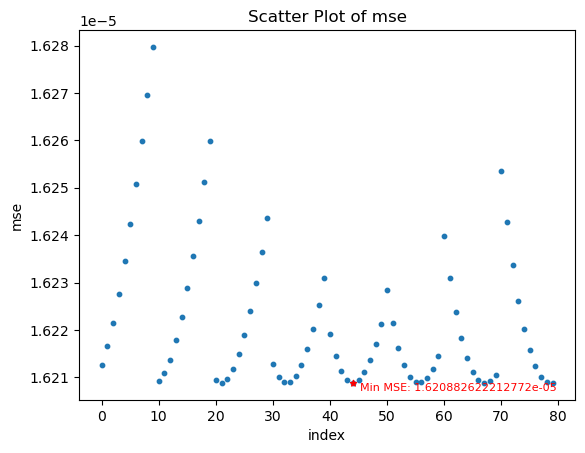

In [311]:
col_mse = 'mse'
valor_minimo = data_mse[col_mse].min()
print(data_mse.loc[data_mse[col_mse] == valor_minimo])
plt.scatter(data_mse.index, data_mse[col_mse], s=10)
#plt.scatter(range(0, 80), data_mse[col_mse].head(80))
plt.scatter(data_mse[col_mse].idxmin() + 0, valor_minimo, marker='*', color='red', s=20, label='Valor Mínimo')
plt.text(data_mse[col_mse].idxmin() + 0, valor_minimo, f'  Min MSE: {valor_minimo}', color='red', fontsize=8, verticalalignment='top')
plt.xlabel('index')
plt.ylabel(col_mse)
plt.title(f'Scatter Plot of {col_mse}')
plt.show()

MSE: 1.620882622212772e-05
Mutual Information: 1.7332167484902985


<Figure size 640x480 with 0 Axes>

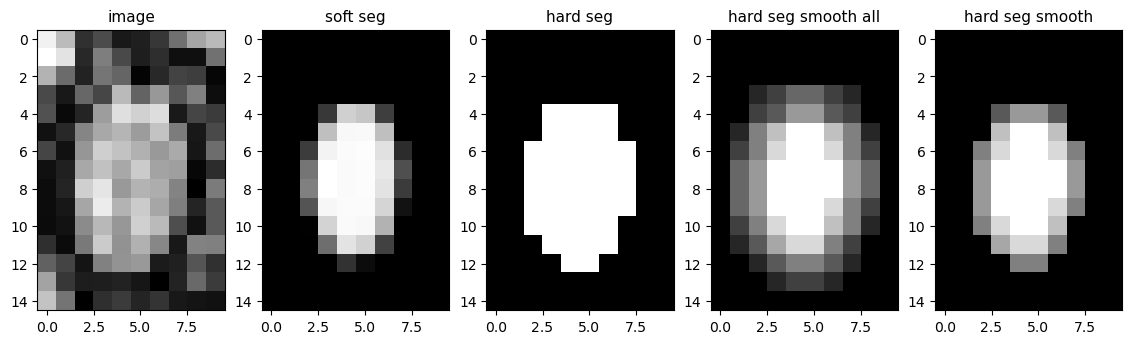

In [5]:
df = []
df_mse = []

a = 25
b = 0 
c = 39

kernel = np.array([[c, a, c],
                   [a, b, a],
                   [c, a, c]])
#kernel = np.array([[0.1, 0.5, 0.1],
#                  [0.5, 1, 0.5],
#                  [0.1, 0.5, 0.1]])

image_gt_bin_dil = np.zeros((image_hard.shape))
image_gt_bin_dil_2 = np.zeros((image_hard.shape))
for i in range (image_hard.shape[2]):
    image_gt_bin_dil[:,:,i] = convolve2d(image_hard[:,:,i], kernel, mode='same', boundary='wrap')

image_gt_bin_dil_2 = image_gt_bin_dil * image_hard
image_gt_bin_dil_2_n = cv2.normalize(image_gt_bin_dil_2, None, 0,1, cv2.NORM_MINMAX)

for i in range (image_hard.shape[2]):
    csa_gt_soft = round (np.sum(image_soft_norm[:,:,i]) * res_1 * res_2, 2)
    csa_gt_smmoth = round (np.sum(image_gt_bin_dil_2_n[:,:,i]) * res_1 * res_2, 2)
    
    d = {"slice":i,"csa_gt_bin":csa_gt_soft,"csa_gt_bin_soft":csa_gt_smmoth}
    df.append(d)
data = pd.DataFrame(data = df)
df1=data
df1 = df1.replace(0, np.nan)


index = 20
mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2_n)
print(f"MSE: {mse}")
mi =  normalized_mutual_information(image_soft_norm, image_gt_bin_dil_2_n)
print(f"Mutual Information: {mi}")
plt.gray()
plt.figure(figsize=(14, 8))
plt.subplot(1, 5, 1)
plt.title("image" , fontsize=11)
plt.imshow(image[80:95,105:115,index])
plt.subplot(1, 5, 2)
plt.title("soft seg" , fontsize=11)
plt.imshow(image_soft_norm[80:95,105:115,index])
plt.subplot(1, 5, 3)
plt.title("hard seg" , fontsize=11)
plt.imshow(image_hard[80:95,105:115,index])
plt.subplot(1, 5, 4)
plt.title("hard seg smooth all" , fontsize=11)
plt.imshow(image_gt_bin_dil[80:95,105:115,index])
plt.subplot(1, 5, 5)
plt.title("hard seg smooth" , fontsize=11)
plt.imshow(image_gt_bin_dil_2_n[80:95,105:115,index])

In [361]:
#nii_save = nib.Nifti1Image(image_gt_bin_dil_2_n, image_data.affine)
#nib.save(nii_save, 'sub-MRS' + str(subject).zfill(2) + '_ses-M0_UNIT1_smooth.nii.gz')

# Kernel 3D experience

In [420]:
df = []
df_mse = []
for a in range(20, 45, 1):
    factor_a = a * 1
    for b in range(0, 2, 1):
        factor_b = b * 0.1
        for c in range(0, 2, 1):
            factor_c = c * 1
            print(factor_a,"/", factor_b,"/", factor_c)
            kernel = np.array([[[factor_c , factor_a , factor_c ],
                               [factor_a , factor_c , factor_a ],
                               [factor_c , factor_a , factor_c ]],

                               [[factor_a , factor_c , factor_a ],
                               [factor_c , factor_b , factor_c ],
                               [factor_a , factor_c , factor_a ]],

                               [[factor_c , factor_a , factor_c ],
                               [factor_a , factor_c , factor_a ],
                               [factor_c , factor_a , factor_c ]]   ])
            image_gt_bin_dil = np.zeros((image_hard.shape))
            image_gt_bin_dil_2 = np.zeros((image_hard.shape))
            #for i in range (image_hard.shape[2]):
            image_gt_bin_dil = convolve(image_hard, kernel,  mode='constant')
            #image_gt_bin_dil[:,:,i] = cv2.normalize(image_gt_bin_dil[:,:,i], None, 0,1, cv2.NORM_MINMAX)
            #    csa_gt_bin_soft = round (np.sum(image_gt_bin_dil[:,:,i])/np.max(image_gt_bin_dil) * res_1 * res_2, 2)
            #    csa_gt_bin = round (np.sum(image_hard[:,:,i]) * res_1 * res_2, 2)
             #   d = {"slice":i,"csa_gt_bin":csa_gt_bin,"csa_gt_bin_soft":csa_gt_bin_soft}
             #   df.append(d)
            #data = pd.DataFrame(data = df)
           # df1=data
            #df1 = df1.replace(0, np.nan)
            image_gt_bin_dil_2 = image_gt_bin_dil * image_hard
            image_gt_bin_dil_2_n = cv2.normalize(image_gt_bin_dil_2, None, 0,1, cv2.NORM_MINMAX)
            #mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2)
            mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2_n)
            mi =  normalized_mutual_information(image_soft_norm, image_gt_bin_dil_2_n)
            print(f"MSE: {mse}" , f"Mutual Information: {mi}")
            f = {"subject":subject,"factor_a":factor_a,"factor_b":factor_b,"factor_c":factor_c,"mse":mse,"mi":mi}
            df_mse.append(f)
            data_mse = pd.DataFrame(data = df_mse)
data_mse    

20 / 0.0 / 0
MSE: 1.546769538276848e-05 Mutual Information: 1.7393349344492504
20 / 0.0 / 1
MSE: 1.556398624276712e-05 Mutual Information: 1.7344900031335175
20 / 0.1 / 0
MSE: 1.5485114383368372e-05 Mutual Information: 1.7393349344492504
20 / 0.1 / 1
MSE: 1.5580544320043974e-05 Mutual Information: 1.7344900031335413
21 / 0.0 / 0
MSE: 1.5467695382768477e-05 Mutual Information: 1.7393349344492504
21 / 0.0 / 1
MSE: 1.5559445603571858e-05 Mutual Information: 1.7344900031335175
21 / 0.1 / 0
MSE: 1.5484284853056954e-05 Mutual Information: 1.7393349344492504
21 / 0.1 / 1
MSE: 1.5575252530587024e-05 Mutual Information: 1.7344900031335175
22 / 0.0 / 0
MSE: 1.5467695382768484e-05 Mutual Information: 1.7393349344492504
22 / 0.0 / 1
MSE: 1.55553132095199e-05 Mutual Information: 1.7357198399021412
22 / 0.1 / 0
MSE: 1.5483530739271614e-05 Mutual Information: 1.7393349344492504
22 / 0.1 / 1
MSE: 1.5570434166193935e-05 Mutual Information: 1.7349065471561511
23 / 0.0 / 0
MSE: 1.546769538276848e-05 Mutu

,subject,factor_a,factor_b,factor_c,mse,mi
0,0,20,0.0,0,0.000015,1.739335
1,0,20,0.0,1,0.000016,1.734490
2,0,20,0.1,0,0.000015,1.739335
3,0,20,0.1,1,0.000016,1.734490
4,0,21,0.0,0,0.000015,1.739335
...,...,...,...,...,...,...
95,0,43,0.1,1,0.000016,1.737684
96,0,44,0.0,0,0.000015,1.739335
97,0,44,0.0,1,0.000016,1.737684
98,0,44,0.1,0,0.000015,1.739335


    subject  factor_a  factor_b  factor_c       mse        mi
4         0        21       0.0         0  0.000015  1.739335
16        0        24       0.0         0  0.000015  1.739335
24        0        26       0.0         0  0.000015  1.739335
28        0        27       0.0         0  0.000015  1.739335
32        0        28       0.0         0  0.000015  1.739335
48        0        32       0.0         0  0.000015  1.739335
64        0        36       0.0         0  0.000015  1.739335
72        0        38       0.0         0  0.000015  1.739335
88        0        42       0.0         0  0.000015  1.739335


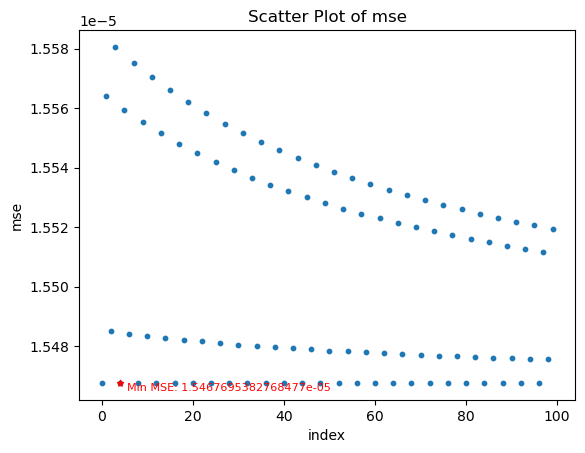

In [422]:
col_mse = 'mse'
valor_minimo = data_mse[col_mse].min()
print(data_mse.loc[data_mse[col_mse] == valor_minimo])
plt.scatter(data_mse.index, data_mse[col_mse], s=10)
#plt.scatter(range(0, 80), data_mse[col_mse].head(80))
plt.scatter(data_mse[col_mse].idxmin() + 0, valor_minimo, marker='*', color='red', s=20, label='Valor Mínimo')
plt.text(data_mse[col_mse].idxmin() + 0, valor_minimo, f'  Min MSE: {valor_minimo}', color='red', fontsize=8, verticalalignment='top')
plt.xlabel('index')
plt.ylabel(col_mse)
plt.title(f'Scatter Plot of {col_mse}')
plt.show()

MSE: 1.5467695382768477e-05
Mutual Information: 1.7393349344492504


<Figure size 640x480 with 0 Axes>

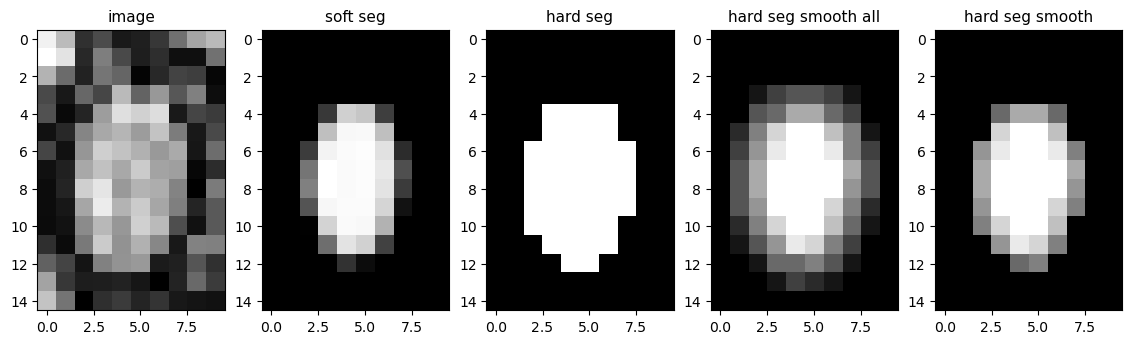

In [6]:
## 3D kernel 
df_3D = []
df_mse = []

factor_a = 21
factor_b = 0
factor_c = 0

kernel = np.array([[[factor_c , factor_a , factor_c ],
                   [factor_a , factor_c , factor_a ],
                   [factor_c , factor_a , factor_c ]],

                   [[factor_a , factor_c , factor_a ],
                   [factor_c , factor_b , factor_c ],
                   [factor_a , factor_c , factor_a ]],

                   [[factor_c , factor_a , factor_c ],
                   [factor_a , factor_c , factor_a ],
                   [factor_c , factor_a , factor_c ]]   ])
#kernel = np.array([[0.1, 0.5, 0.1],
#                  [0.5, 1, 0.5],
#                  [0.1, 0.5, 0.1]])

image_gt_bin_dil = np.zeros((image_hard.shape))
image_gt_bin_dil_2 = np.zeros((image_hard.shape))

image_gt_bin_dil = convolve(image_hard, kernel, mode='constant', cval=0.0)
image_gt_bin_dil_2 = image_gt_bin_dil * image_hard
image_gt_bin_dil_2_n = cv2.normalize(image_gt_bin_dil_2, None, 0,1, cv2.NORM_MINMAX)

for i in range (image_hard.shape[2]):
    csa_gt_bin_soft = round (np.sum(image_soft_norm[:,:,i]) * res_1 * res_2, 2)
    csa_gt_smmoth = round (np.sum(image_gt_bin_dil_2_n[:,:,i]) * res_1 * res_2, 2)

    d = {"slice":i,"csa_gt_bin":csa_gt_bin_soft,"csa_gt_bin_soft":csa_gt_smmoth}
    df_3D.append(d)
data = pd.DataFrame(data = df_3D)
df1_3D=data
df1_3D = df1_3D.replace(0, np.nan)


index = 20
mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2_n)
print(f"MSE: {mse}")
mi =  normalized_mutual_information(image_soft_norm, image_gt_bin_dil_2_n)
print(f"Mutual Information: {mi}")
plt.gray()
plt.figure(figsize=(14, 8))
plt.subplot(1, 5, 1)
plt.title("image" , fontsize=11)
plt.imshow(image[80:95,105:115,index])
plt.subplot(1, 5, 2)
plt.title("soft seg" , fontsize=11)
plt.imshow(image_soft_norm[80:95,105:115,index])
plt.subplot(1, 5, 3)
plt.title("hard seg" , fontsize=11)
plt.imshow(image_hard[80:95,105:115,index])
plt.subplot(1, 5, 4)
plt.title("hard seg smooth all" , fontsize=11)
plt.imshow(image_gt_bin_dil[80:95,105:115,index])
plt.subplot(1, 5, 5)
plt.title("hard seg smooth" , fontsize=11)
plt.imshow(image_gt_bin_dil_2_n[80:95,105:115,index])

In [7]:
nii_save = nib.Nifti1Image(image_gt_bin_dil, image_data.affine)
nib.save(nii_save, 'sub-MRS' + str(subject).zfill(2) + '_ses-M0_UNIT1_smooth.nii.gz')

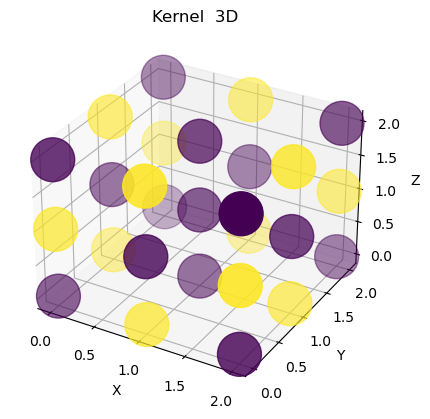

In [8]:
x, y, z = np.indices((3, 3, 3))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=kernel.flatten(), s=1000, marker='o', cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Kernel  3D')
plt.show()

In [11]:
df1['csa_gt_bin_soft_3D'] = df1_3D['csa_gt_bin_soft']
print(df1)

     slice  csa_gt_bin  csa_gt_bin_soft  csa_gt_bin_soft_3D
0      NaN       12.38            16.51               11.87
1      1.0       18.06            21.07               20.80
2      2.0       19.77            21.78               22.41
3      3.0       20.70            23.27               23.73
4      4.0       21.58            24.05               24.39
..     ...         ...              ...                 ...
315  315.0         NaN              NaN                 NaN
316  316.0         NaN              NaN                 NaN
317  317.0         NaN              NaN                 NaN
318  318.0         NaN              NaN                 NaN
319  319.0         NaN              NaN                 NaN

[320 rows x 4 columns]


'\npairs=[ (\'Soft\' , \'2D\'),\n        (\'Soft\' , \'3D\'),\n        (\'2D\'   , \'3D\')  ]\n\nannotator_csa_gm = Annotator(ax_csa_gm, pairs, data = result, x="Method", y="CSA") \nannotator_csa_gm.configure(test=\'Mann-Whitney\', text_format=\'star\', loc=\'inside\').apply_test()\nannotator_csa_gm.apply_and_annotate()\n'

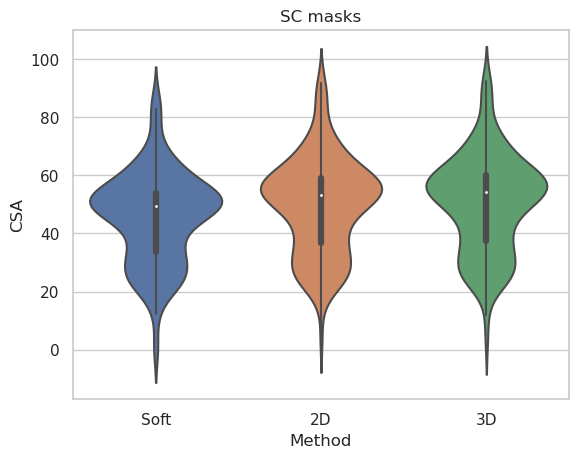

In [12]:
csa_ca_pred = df1.filter(['csa_gt_bin'], axis=1)
csa_ca_pred.insert(0, 'Method', 'Soft')
csa_ca_pred.rename(columns={'csa_gt_bin': 'CSA'}, inplace=True)

csa_ca_pred_bin = df1.filter(['csa_gt_bin_soft'], axis=1)
csa_ca_pred_bin.insert(0, 'Method', '2D')
csa_ca_pred_bin.rename(columns={'csa_gt_bin_soft': 'CSA'}, inplace=True)

csa_ca_pred_dil = df1.filter(['csa_gt_bin_soft_3D'], axis=1)
csa_ca_pred_dil.insert(0, 'Method', '3D')
csa_ca_pred_dil.rename(columns={'csa_gt_bin_soft_3D': 'CSA'}, inplace=True)

frames = [csa_ca_pred , csa_ca_pred_bin, csa_ca_pred_dil ]
result = pd.concat(frames, axis=0)

sns.set(style="whitegrid")
plt.title("SC masks")
ax_csa_gm = sns.violinplot(data=result, x="Method", y= "CSA")
#plt.xticks(rotation=90)
"""
pairs=[ ('Soft' , '2D'),
        ('Soft' , '3D'),
        ('2D'   , '3D')  ]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data = result, x="Method", y="CSA") 
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
"""

# reslicing to  0.5mm isotropic with 3D kernel

In [2]:
subject = 0
image_data = nib.load( 'resampled/sub-MRS' + str(subject).zfill(2) + '_ses-M0_UNIT1_05.nii.gz')
image = np.array(image_data.get_fdata())
header_image = image_data.header
res_1 = header_image["pixdim"][2]
res_2 = header_image["pixdim"][3]
print("res = ",res_1, res_2)
print (image.shape)
#image_data_sc = nib.load( patch + 'derivatives/labels/sub-MRS' + str(subject).zfill(2) + '/ses-M0/anat/sub-MRS' + str(subject).zfill(2) + '_ses-M0_UNIT1_label-SC_seg_rater2.nii.gz')
image_data_soft = nib.load('resampled/sub-MRS' + str(subject).zfill(2) + '_ses-M0_UNIT1_soft_05.nii.gz')
image_soft = np.array(image_data_soft.get_fdata())
image_soft_norm = cv2.normalize(image_soft, None, 0,1, cv2.NORM_MINMAX)
image_data_hard = nib.load('resampled/sub-MRS' + str(subject).zfill(2) + '_ses-M0_UNIT1_hard_05_bin.nii.gz')
image_hard = np.array(image_data_hard.get_fdata())

res =  0.4994877 0.5
(48, 59, 308)


MSE: 0.007665092145705405
Mutual Information: 1.458314785950641


<Figure size 640x480 with 0 Axes>

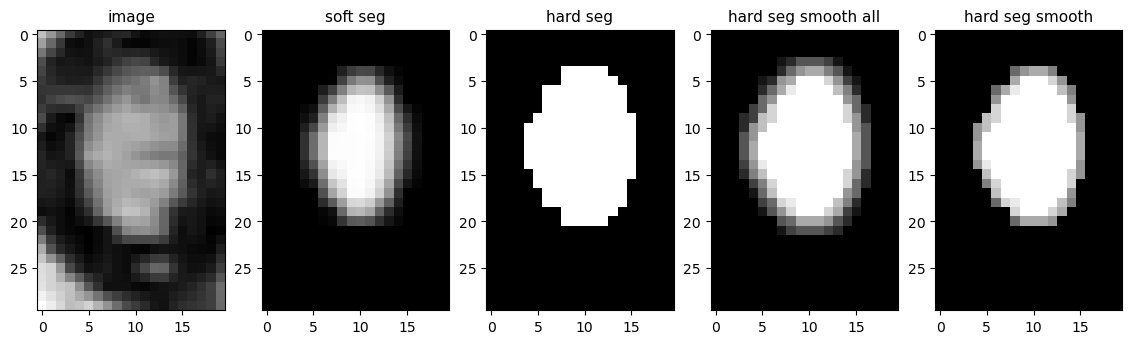

In [3]:
## 3D kernel 
df_3D = []
df_mse = []

factor_a = 21
factor_b = 0
factor_c = 0

kernel = np.array([[[factor_c , factor_a , factor_c ],
                   [factor_a , factor_c , factor_a ],
                   [factor_c , factor_a , factor_c ]],

                   [[factor_a , factor_c , factor_a ],
                   [factor_c , factor_b , factor_c ],
                   [factor_a , factor_c , factor_a ]],

                   [[factor_c , factor_a , factor_c ],
                   [factor_a , factor_c , factor_a ],
                   [factor_c , factor_a , factor_c ]]   ])
#kernel = np.array([[0.1, 0.5, 0.1],
#                  [0.5, 1, 0.5],
#                  [0.1, 0.5, 0.1]])

image_gt_bin_dil = np.zeros((image_hard.shape))
image_gt_bin_dil_2 = np.zeros((image_hard.shape))

image_gt_bin_dil = convolve(image_hard, kernel, mode='constant', cval=0.0)
image_gt_bin_dil_2 = image_gt_bin_dil * image_hard
image_gt_bin_dil_2_n = cv2.normalize(image_gt_bin_dil_2, None, 0,1, cv2.NORM_MINMAX)

for i in range (image_hard.shape[2]):
    csa_gt_bin_soft = round (np.sum(image_soft_norm[:,:,i]) * res_1 * res_2, 2)
    csa_gt_smmoth = round (np.sum(image_gt_bin_dil_2_n[:,:,i]) * res_1 * res_2, 2)

    d = {"slice":i,"csa_gt_bin":csa_gt_bin_soft,"csa_gt_bin_soft":csa_gt_smmoth}
    df_3D.append(d)
data = pd.DataFrame(data = df_3D)
df1_3D=data
df1_3D = df1_3D.replace(0, np.nan)


index = 20
mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2_n)
print(f"MSE: {mse}")
mi =  normalized_mutual_information(image_soft_norm, image_gt_bin_dil_2_n)
print(f"Mutual Information: {mi}")
plt.gray()
plt.figure(figsize=(14, 8))
plt.subplot(1, 5, 1)
plt.title("image" , fontsize=11)
plt.imshow(image[10:40,20:40,index])
plt.subplot(1, 5, 2)
plt.title("soft seg" , fontsize=11)
plt.imshow(image_soft_norm[10:40,20:40,index])
plt.subplot(1, 5, 3)
plt.title("hard seg" , fontsize=11)
plt.imshow(image_hard[10:40,20:40,index])
plt.subplot(1, 5, 4)
plt.title("hard seg smooth all" , fontsize=11)
plt.imshow(image_gt_bin_dil[10:40,20:40,index])
plt.subplot(1, 5, 5)
plt.title("hard seg smooth" , fontsize=11)
plt.imshow(image_gt_bin_dil_2_n[10:40,20:40,index])

In [79]:
df = []
df_mse = []
for a in range(-10, 10, 4):
    factor_a = a * 1
    for b in range(-3, 3, 1):
        factor_b = b * 0.1
        for c in range(-5, 5, 2):
            factor_c = c * 1
            for d in range(-2, 2, 3):
                factor_d = d * 1            
                print(factor_a,"/", factor_b,"/", factor_c,"/", factor_d)
                kernel = np.array([[factor_d , factor_c , factor_a , factor_c , factor_d],
                                   [factor_c , factor_a , factor_b , factor_a , factor_c],
                                   [factor_a , factor_b , factor_b , factor_b , factor_a],
                                   [factor_c , factor_a , factor_b , factor_a , factor_c],
                                   [factor_d , factor_c , factor_a , factor_c , factor_d]])
                image_gt_bin_dil = np.zeros((image_hard.shape))
                image_gt_bin_dil_2 = np.zeros((image_hard.shape))
                for i in range (image_hard.shape[2]):
                    image_gt_bin_dil[:,:,i] = convolve2d(image_hard[:,:,i], kernel, mode='same', boundary='wrap')
                    #image_gt_bin_dil[:,:,i] = cv2.normalize(image_gt_bin_dil[:,:,i], None, 0,1, cv2.NORM_MINMAX)
                #    csa_gt_bin_soft = round (np.sum(image_gt_bin_dil[:,:,i])/np.max(image_gt_bin_dil) * res_1 * res_2, 2)
                #    csa_gt_bin = round (np.sum(image_hard[:,:,i]) * res_1 * res_2, 2)
                 #   d = {"slice":i,"csa_gt_bin":csa_gt_bin,"csa_gt_bin_soft":csa_gt_bin_soft}
                 #   df.append(d)
                #data = pd.DataFrame(data = df)
               # df1=data
                #df1 = df1.replace(0, np.nan)
                image_gt_bin_dil_2 = image_gt_bin_dil * image_hard
                image_gt_bin_dil_2_n = cv2.normalize(image_gt_bin_dil_2, None, 0,1, cv2.NORM_MINMAX)
                #mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2)
                mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2_n)
                mi =  normalized_mutual_information(image_soft_norm, image_gt_bin_dil_2_n)
                print(f"MSE: {mse}" , f"Mutual Information: {mi}")
                f = {"subject":subject,"factor_a":factor_a,"factor_b":factor_b,"factor_c":factor_c,"factor_d":factor_d,"mse":mse,"mi":mi}
                df_mse.append(f)
                data_mse = pd.DataFrame(data = df_mse)
data_mse    

-10 / -0.30000000000000004 / 0
MSE: 0.9576337633384492 Mutual Information: 1.4685290584322381
-10 / -0.30000000000000004 / 0
MSE: 0.9501252682709176 Mutual Information: 1.4715746168101256
-10 / -0.30000000000000004 / 0
MSE: 0.942260884314274 Mutual Information: 1.4733013850155594
-10 / -0.30000000000000004 / 0
MSE: 0.9342315314100034 Mutual Information: 1.47344085739599
-10 / -0.30000000000000004 / 3
MSE: 0.9409765463538364 Mutual Information: 1.4674057690370266
-10 / -0.30000000000000004 / 3
MSE: 0.9329133935415709 Mutual Information: 1.4646901279060325
-10 / -0.30000000000000004 / 3
MSE: 0.891743385259176 Mutual Information: 1.4640658326304132
-10 / -0.30000000000000004 / 3
MSE: 0.6911440960774095 Mutual Information: 1.444063173259175
-10 / -0.30000000000000004 / 6
MSE: 0.8907701248920389 Mutual Information: 1.467212810684763
-10 / -0.30000000000000004 / 6
MSE: 0.7898859856546852 Mutual Information: 1.4573700102791927
-10 / -0.30000000000000004 / 6
MSE: 0.5945277679161057 Mutual Info

MSE: 0.7281596608537376 Mutual Information: 1.4662673302851397
-7 / -0.30000000000000004 / 6
MSE: 0.46549686176419014 Mutual Information: 1.4478239026709625
-7 / -0.30000000000000004 / 6
MSE: 0.26115650079867375 Mutual Information: 1.4566900910322862
-7 / -0.30000000000000004 / 6
MSE: 0.17974544496136266 Mutual Information: 1.4512607825703778
-7 / -0.30000000000000004 / 9
MSE: 0.2756653119382379 Mutual Information: 1.4182852546918057
-7 / -0.30000000000000004 / 9
MSE: 0.16905250324617815 Mutual Information: 1.4539520563998625
-7 / -0.30000000000000004 / 9
MSE: 0.10929242065955366 Mutual Information: 1.4598164054632674
-7 / -0.30000000000000004 / 9
MSE: 0.0761639573348978 Mutual Information: 1.4619842957039126
-7 / -0.2 / 0
MSE: 0.9576335328957506 Mutual Information: 1.468529058432238
-7 / -0.2 / 0
MSE: 0.9467811387872463 Mutual Information: 1.4728175932126772
-7 / -0.2 / 0
MSE: 0.9353577855131856 Mutual Information: 1.4718333582285503
-7 / -0.2 / 0
MSE: 0.7262862444497714 Mutual Inform

MSE: 0.9384786928006313 Mutual Information: 1.4699292094153438
-4 / -0.2 / 0
MSE: 0.6097142418621563 Mutual Information: 1.462708032120784
-4 / -0.2 / 0
MSE: 0.3144426148021213 Mutual Information: 1.4708192306513137
-4 / -0.2 / 3
MSE: 0.808713476253215 Mutual Information: 1.4636285485038771
-4 / -0.2 / 3
MSE: 0.37776371703367906 Mutual Information: 1.4014001254268809
-4 / -0.2 / 3
MSE: 0.1782559844130086 Mutual Information: 1.4526721594896506
-4 / -0.2 / 3
MSE: 0.10059830508165231 Mutual Information: 1.4561318001778003
-4 / -0.2 / 6
MSE: 0.15755629145010433 Mutual Information: 1.4536279333415705
-4 / -0.2 / 6
MSE: 0.0758207319500925 Mutual Information: 1.4577291072253997
-4 / -0.2 / 6
MSE: 0.04481997403204686 Mutual Information: 1.4554211890498785
-4 / -0.2 / 6
MSE: 0.03008222259946215 Mutual Information: 1.4539261917519546
-4 / -0.2 / 9
MSE: 0.027623429436936874 Mutual Information: 1.4657440107501378
-4 / -0.2 / 9
MSE: 0.018445890450340608 Mutual Information: 1.4561017410593773
-4 / -

MSE: 0.002680203468944035 Mutual Information: 1.4641574940080886
-1 / -0.2 / 6
MSE: 0.0026527507063077564 Mutual Information: 1.4596831257799616
-1 / -0.2 / 9
MSE: 0.0030662564926930624 Mutual Information: 1.4657536541868548
-1 / -0.2 / 9
MSE: 0.0028935263186317876 Mutual Information: 1.4612753922565995
-1 / -0.2 / 9
MSE: 0.0028001983121318068 Mutual Information: 1.4623358578872856
-1 / -0.2 / 9
MSE: 0.0027472521646938336 Mutual Information: 1.4638176513445822
-1 / -0.1 / 0
MSE: 0.9576469448788185 Mutual Information: 1.468498927858748
-1 / -0.1 / 0
MSE: 0.18158229070082452 Mutual Information: 1.4614865449466372
-1 / -0.1 / 0
MSE: 0.04201247433234678 Mutual Information: 1.4718245118804458
-1 / -0.1 / 0
MSE: 0.018623007196127587 Mutual Information: 1.472735103581854
-1 / -0.1 / 3
MSE: 0.008577565938861284 Mutual Information: 1.455403287710394
-1 / -0.1 / 3
MSE: 0.0046205997493964455 Mutual Information: 1.4576488212415726
-1 / -0.1 / 3
MSE: 0.0036383784248314086 Mutual Information: 1.4549

KeyboardInterrupt: 

     subject  factor_a  factor_b  factor_c  factor_d       mse        mi
299        0        -1      -0.3         6         9  0.002629  1.461241


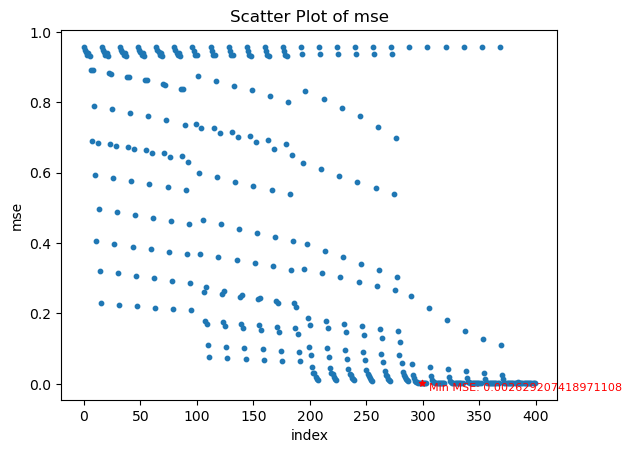

In [80]:
col_mse = 'mse'
valor_minimo = data_mse[col_mse].min()
print(data_mse.loc[data_mse[col_mse] == valor_minimo])
plt.scatter(data_mse.index, data_mse[col_mse], s=10)
#plt.scatter(range(0, 80), data_mse[col_mse].head(80))
plt.scatter(data_mse[col_mse].idxmin() + 0, valor_minimo, marker='*', color='red', s=20, label='Valor Mínimo')
plt.text(data_mse[col_mse].idxmin() + 0, valor_minimo, f'  Min MSE: {valor_minimo}', color='red', fontsize=8, verticalalignment='top')
plt.xlabel('index')
plt.ylabel(col_mse)
plt.title(f'Scatter Plot of {col_mse}')
plt.show()

MSE: 0.002629207418971108
Mutual Information: 1.4612410461167606


<Figure size 640x480 with 0 Axes>

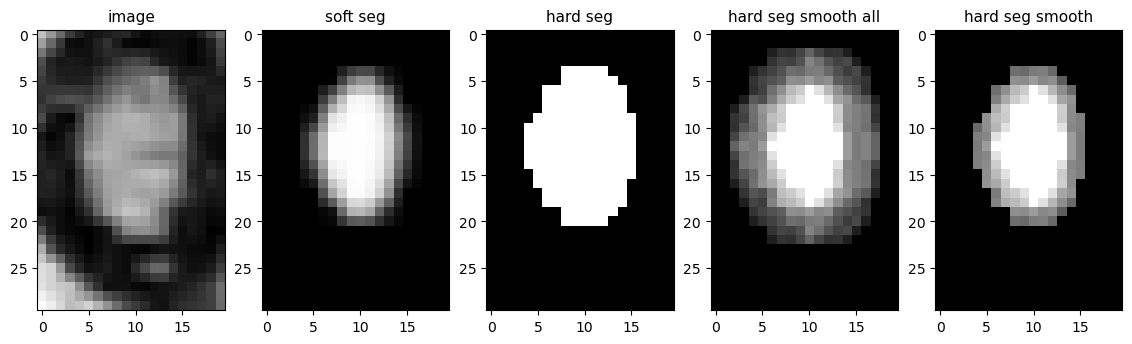

In [81]:
df = []
df_mse = []

factor_a = -1
factor_b = -0.3
factor_c = 6
factor_d = 9

kernel = np.array([[factor_d , factor_c , factor_a , factor_c , factor_d],
                   [factor_c , factor_a , factor_b , factor_a , factor_c],
                   [factor_a , factor_b , factor_b , factor_b , factor_a],
                   [factor_c , factor_a , factor_b , factor_a , factor_c],
                   [factor_d , factor_c , factor_a , factor_c , factor_d]])
#kernel = np.array([[0.1, 0.5, 0.1],
#                  [0.5, 1, 0.5],
#                  [0.1, 0.5, 0.1]])

image_gt_bin_dil = np.zeros((image_hard.shape))
image_gt_bin_dil_2 = np.zeros((image_hard.shape))
for i in range (image_hard.shape[2]):
    image_gt_bin_dil[:,:,i] = convolve2d(image_hard[:,:,i], kernel, mode='same', boundary='wrap')

image_gt_bin_dil_2 = image_gt_bin_dil * image_hard
image_gt_bin_dil_2_n = cv2.normalize(image_gt_bin_dil_2, None, 0,1, cv2.NORM_MINMAX)

for i in range (image_hard.shape[2]):
    csa_gt_soft = round (np.sum(image_soft_norm[:,:,i]) * res_1 * res_2, 2)
    csa_gt_smmoth = round (np.sum(image_gt_bin_dil_2_n[:,:,i]) * res_1 * res_2, 2)
    
    d = {"slice":i,"csa_gt_bin":csa_gt_soft,"csa_gt_bin_soft":csa_gt_smmoth}
    df.append(d)
data = pd.DataFrame(data = df)
df1=data
df1 = df1.replace(0, np.nan)
index = 20
mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2_n)
print(f"MSE: {mse}")
mi =  normalized_mutual_information(image_soft_norm, image_gt_bin_dil_2_n)
print(f"Mutual Information: {mi}")

plt.gray()
plt.figure(figsize=(14, 8))
plt.subplot(1, 5, 1)
plt.title("image" , fontsize=11)
plt.imshow(image[10:40,20:40,index])
plt.subplot(1, 5, 2)
plt.title("soft seg" , fontsize=11)
plt.imshow(image_soft_norm[10:40,20:40,index])
plt.subplot(1, 5, 3)
plt.title("hard seg" , fontsize=11)
plt.imshow(image_hard[10:40,20:40,index])
plt.subplot(1, 5, 4)
plt.title("hard seg smooth all" , fontsize=11)
plt.imshow(image_gt_bin_dil[10:40,20:40,index])
plt.subplot(1, 5, 5)
plt.title("hard seg smooth" , fontsize=11)
plt.imshow(image_gt_bin_dil_2_n[10:40,20:40,index])

In [47]:
image_soft_norm[10:40,20:40,index]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [ ]:
df = []
df_mse = []
for a in range(20, 45, 1):
    factor_a = a * 1
    for b in range(0, 2, 1):
        factor_b = b * 0.1
        for c in range(0, 2, 1):
            factor_c = c * 1
            print(factor_a,"/", factor_b,"/", factor_c)
            kernel = np.array([[[factor_c , factor_a , factor_c ],
                               [factor_a , factor_c , factor_a ],
                               [factor_c , factor_a , factor_c ]],

                               [[factor_a , factor_c , factor_a ],
                               [factor_c , factor_b , factor_c ],
                               [factor_a , factor_c , factor_a ]],

                               [[factor_c , factor_a , factor_c ],
                               [factor_a , factor_c , factor_a ],
                               [factor_c , factor_a , factor_c ]]   ])
            image_gt_bin_dil = np.zeros((image_hard.shape))
            image_gt_bin_dil_2 = np.zeros((image_hard.shape))
            #for i in range (image_hard.shape[2]):
            image_gt_bin_dil = convolve(image_hard, kernel,  mode='constant')
            #image_gt_bin_dil[:,:,i] = cv2.normalize(image_gt_bin_dil[:,:,i], None, 0,1, cv2.NORM_MINMAX)
            #    csa_gt_bin_soft = round (np.sum(image_gt_bin_dil[:,:,i])/np.max(image_gt_bin_dil) * res_1 * res_2, 2)
            #    csa_gt_bin = round (np.sum(image_hard[:,:,i]) * res_1 * res_2, 2)
             #   d = {"slice":i,"csa_gt_bin":csa_gt_bin,"csa_gt_bin_soft":csa_gt_bin_soft}
             #   df.append(d)
            #data = pd.DataFrame(data = df)
           # df1=data
            #df1 = df1.replace(0, np.nan)
            image_gt_bin_dil_2 = image_gt_bin_dil * image_hard
            image_gt_bin_dil_2_n = cv2.normalize(image_gt_bin_dil_2, None, 0,1, cv2.NORM_MINMAX)
            #mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2)
            mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2_n)
            mi =  normalized_mutual_information(image_soft_norm, image_gt_bin_dil_2_n)
            print(f"MSE: {mse}" , f"Mutual Information: {mi}")
            f = {"subject":subject,"factor_a":factor_a,"factor_b":factor_b,"factor_c":factor_c,"mse":mse,"mi":mi}
            df_mse.append(f)
            data_mse = pd.DataFrame(data = df_mse)
data_mse    

In [ ]:
## 3D kernel 
df_3D = []
df_mse = []

factor_a = 21
factor_b = 0
factor_c = 0

kernel = np.array([[[factor_c , factor_a , factor_c ],
                   [factor_a , factor_c , factor_a ],
                   [factor_c , factor_a , factor_c ]],

                   [[factor_a , factor_c , factor_a ],
                   [factor_c , factor_b , factor_c ],
                   [factor_a , factor_c , factor_a ]],

                   [[factor_c , factor_a , factor_c ],
                   [factor_a , factor_c , factor_a ],
                   [factor_c , factor_a , factor_c ]]   ])
#kernel = np.array([[0.1, 0.5, 0.1],
#                  [0.5, 1, 0.5],
#                  [0.1, 0.5, 0.1]])

image_gt_bin_dil = np.zeros((image_hard.shape))
image_gt_bin_dil_2 = np.zeros((image_hard.shape))

image_gt_bin_dil = convolve(image_hard, kernel, mode='constant', cval=0.0)
image_gt_bin_dil_2 = image_gt_bin_dil * image_hard
image_gt_bin_dil_2_n = cv2.normalize(image_gt_bin_dil_2, None, 0,1, cv2.NORM_MINMAX)

for i in range (image_hard.shape[2]):
    csa_gt_bin_soft = round (np.sum(image_soft_norm[:,:,i]) * res_1 * res_2, 2)
    csa_gt_smmoth = round (np.sum(image_gt_bin_dil_2_n[:,:,i]) * res_1 * res_2, 2)

    d = {"slice":i,"csa_gt_bin":csa_gt_bin_soft,"csa_gt_bin_soft":csa_gt_smmoth}
    df_3D.append(d)
data = pd.DataFrame(data = df_3D)
df1_3D=data
df1_3D = df1_3D.replace(0, np.nan)


index = 20
mse = mean_squared_error(image_soft_norm, image_gt_bin_dil_2_n)
print(f"MSE: {mse}")
mi =  normalized_mutual_information(image_soft_norm, image_gt_bin_dil_2_n)
print(f"Mutual Information: {mi}")
plt.gray()
plt.figure(figsize=(14, 8))
plt.subplot(1, 5, 1)
plt.title("image" , fontsize=11)
plt.imshow(image[80:95,105:115,index])
plt.subplot(1, 5, 2)
plt.title("soft seg" , fontsize=11)
plt.imshow(image_soft_norm[80:95,105:115,index])
plt.subplot(1, 5, 3)
plt.title("hard seg" , fontsize=11)
plt.imshow(image_hard[80:95,105:115,index])
plt.subplot(1, 5, 4)
plt.title("hard seg smooth all" , fontsize=11)
plt.imshow(image_gt_bin_dil[80:95,105:115,index])
plt.subplot(1, 5, 5)
plt.title("hard seg smooth" , fontsize=11)
plt.imshow(image_gt_bin_dil_2_n[80:95,105:115,index])

In [ ]:
df1['csa_gt_bin_soft_3D'] = df1_3D['csa_gt_bin_soft']
print(df1)

In [ ]:
csa_ca_pred = df1.filter(['csa_gt_bin'], axis=1)
csa_ca_pred.insert(0, 'Method', 'Soft')
csa_ca_pred.rename(columns={'csa_gt_bin': 'CSA'}, inplace=True)

csa_ca_pred_bin = df1.filter(['csa_gt_bin_soft'], axis=1)
csa_ca_pred_bin.insert(0, 'Method', '2D')
csa_ca_pred_bin.rename(columns={'csa_gt_bin_soft': 'CSA'}, inplace=True)

csa_ca_pred_dil = df1.filter(['csa_gt_bin_soft_3D'], axis=1)
csa_ca_pred_dil.insert(0, 'Method', '3D')
csa_ca_pred_dil.rename(columns={'csa_gt_bin_soft_3D': 'CSA'}, inplace=True)

frames = [csa_ca_pred , csa_ca_pred_bin, csa_ca_pred_dil ]
result = pd.concat(frames, axis=0)

sns.set(style="whitegrid")
plt.title("SC masks")
ax_csa_gm = sns.violinplot(data=result, x="Method", y= "CSA")
#plt.xticks(rotation=90)

pairs=[ ('Soft' , '2D'),
        ('Soft' , '3D'),
        ('2D'   , '3D')  ]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data = result, x="Method", y="CSA") 
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

# res 0.25